In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Line to unpack .xvg generated by GROMACS
t_e, ene = np.loadtxt("./energy.xvg",comments=["@","#"],unpack=True)

In [2]:
# "Accumulated" Mean
n_data = len(ene)
ene_mean = np.zeros(n_data)

for i in range(n_data):
    ene_mean[i] = np.mean(ene[0:i+1])

# Difference and Comparison
dif = abs(ene - ene_mean)
dif_mean = np.zeros(n_data)
for i in range(n_data):
    dif_mean[i] = np.mean(dif[0:i+1])

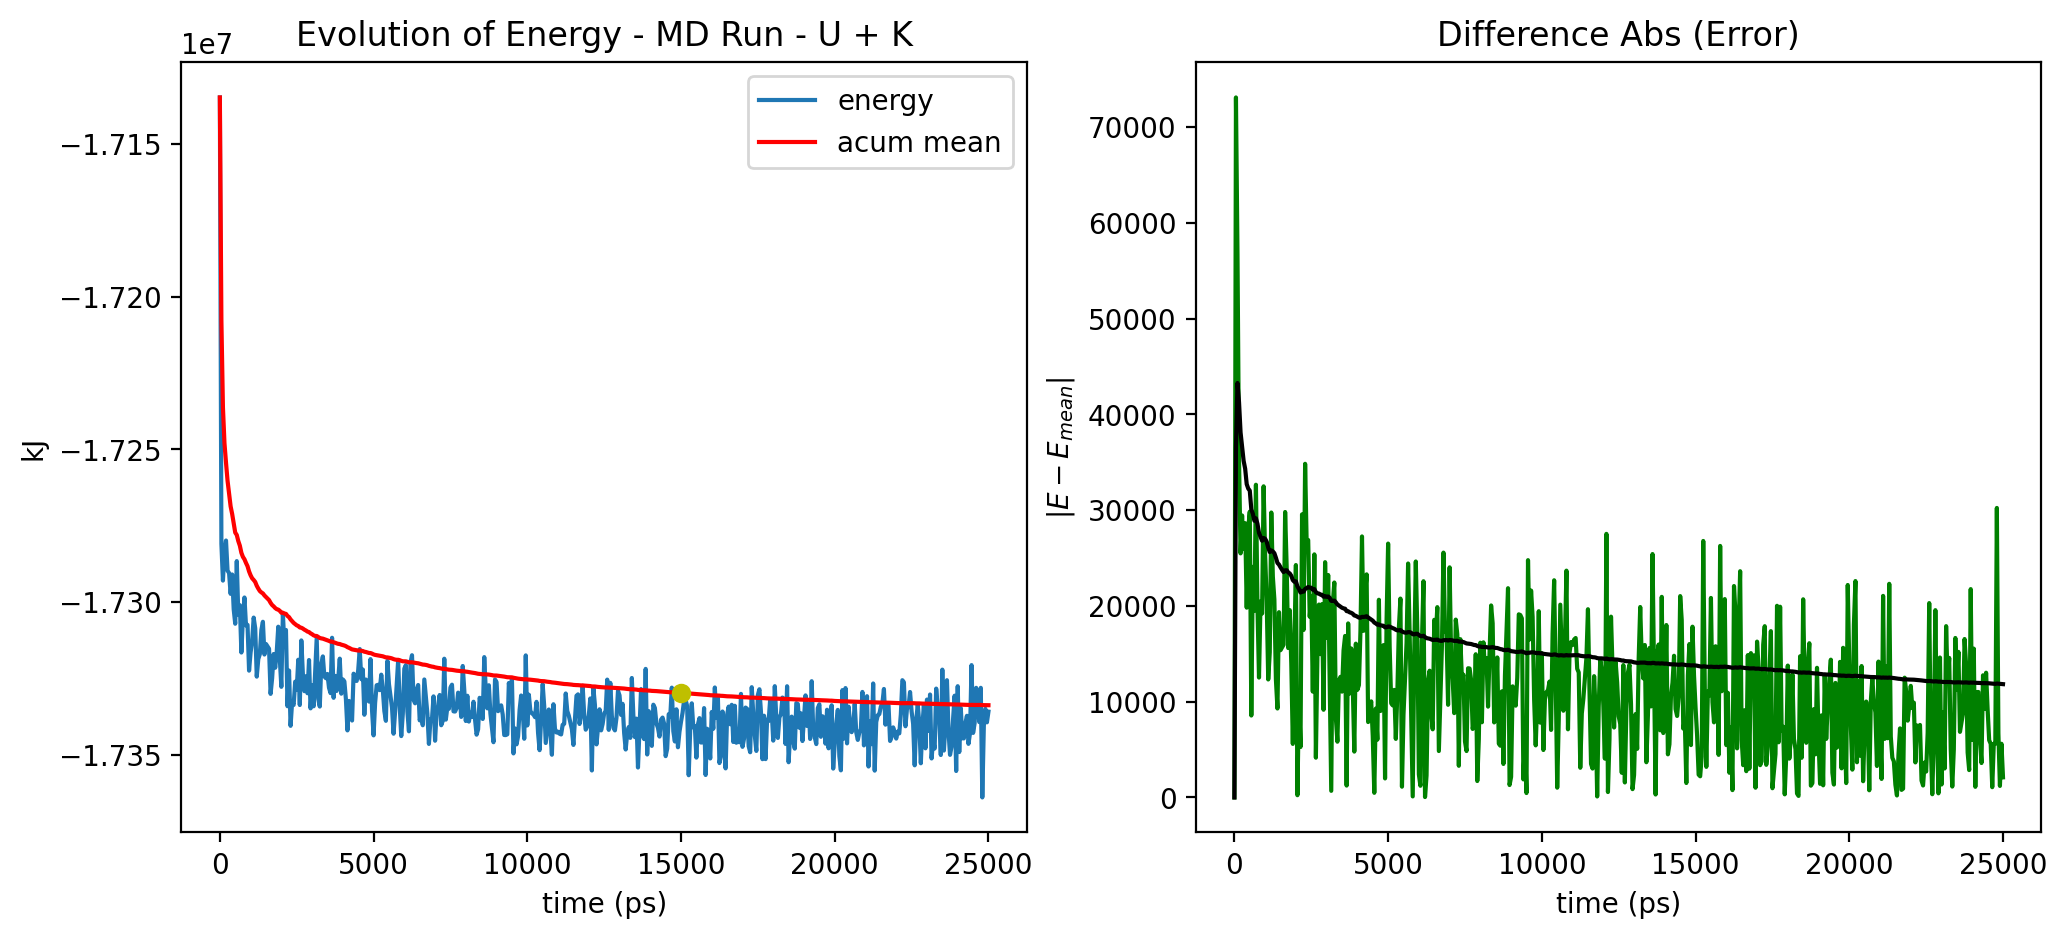

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=200)

# -- Energy and Mean --
axs[0].plot(t_e, ene, label="energy")
axs[0].plot(t_e, ene_mean, label="acum mean", color="r")
# Get the point at 10 ns = 10000 ps
mask = (t_e == 15000)
selected = ene_mean[mask]
axs[0].scatter([15000], selected, color="y", zorder=3)
axs[0].set_xlabel("time (ps)")
axs[0].set_ylabel("kJ")
axs[0].set_title("Evolution of Energy - MD Run - U + K")
axs[0].legend()

# -- Difference Evolution --
axs[1].plot(t_e, dif, color='g', label = 'errors')
axs[1].plot(t_e, dif_mean, color='k', label = 'acum mean')
axs[1].set_xlabel('time (ps)')
axs[1].set_ylabel(r'$|E - E_{mean}|$')
axs[1].set_title('Difference Abs (Error)')

plt.show()